
# Examen


- DIEGO ROMARIO BARRAGAN ARONI


In [336]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns = 500
from gc import collect

In [337]:
telco_churn = pd.read_excel('../Data/Base_Datos.xlsx',sep='|')

In [338]:
telco_churn.drop(['CODMES','KEY_VALUE'],axis=1,inplace=True)

In [339]:
telco_churn.head()

,TIPO_CLIENTE,SEXO,EDAD,ESTADO_CIVIL,CTD_HIJOS,NIVEL_EDUCATIVO,TIENE_VEHICULO,REGION,TIPOCONTRIBUYENTE,SITUACION_LABORAL,INGRESO,ANTIGUEDAD_CLIENTE,MESES_EXPIRACION,MESES_PARA_MEMBRESIA,MONTO_LINEA_TOTAL,MONTO_DE_TOTAL,ADICIONALES_HISTORICO,ADICIONALES_ACTIVAS,NUM_TRX_6UM,NUM_TRX_UM,PROM_TRX_6UM,VAR_TRX_61,VAR_TRX_31,MTO_TOT_6UM,MTO_TOT_UM,PROM_MTO_6UM,VAR_MTO_61,VAR_MTO_31,TICKET_PROM_6M,TICKET_UM,VAR_TICKET_61,VAR_TICKET_31,ULT_MES_CONSUMO,FLG_DE_6UM,FLG_DE_UM,NUM_TRX_DE_6UM,NUM_TRX_DE_UM,PROM_TRX_DE_6UM,VAR_TRX_DE_61,VAR_TRX_DE_31,MTO_DE_6UM,MTO_DE_UM,PROM_MTO_DE_6UM,VAR_MTO_DE_61,VAR_MTO_DE_31,PROM_TRX_CONSUMO_6UM,VAR_TRX_CONSUMO_61,VAR_TRX_CONSUMO_31,PROM_MTO_CONSUMO_6UM,VAR_MTO_CONSUMO_61,VAR_MTO_CONSUMO_31,PCT_TRXDE_6UM,PCT_MTODE_6UM,FLG_CUOTAS_6UM,FLG_CUOTAS_UM,NUM_TRX_CUOTAS_6UM,NUM_TRX_CUOTAS_UM,PROM_TRX_CUOTAS_6UM,VAR_TRX_CUOTAS_61,VAR_TRX_CUOTAS_31,MTO_CUOTAS_6UM,MTO_CUOTAS_UM,PROM_MTO_CUOTAS_6UM,VAR_MTO_CUOTAS_61,VAR_MTO_CUOTAS_31,PROM_TRX_REVOL_6UM,VAR_TRX_REVOL_61,VAR_TRX_REVOL_31,PROM_MTO_REVOL_6UM,VAR_MTO_REVOL_61,VAR_MTO_REVOL_31,PCT_TRXCUOTAS_6UM,PCT_MTOCUOTAS_6UM,FLG_INTER_6UM,FLG_INTER_UM,PROM_TRX_INTER_6UM,VAR_TRX_INTER_61,PROM_MTO_INTER_6UM,VAR_MTO_INTER_61,PCT_TRXINTER_6UM,PCT_MTOINTER_6UM,FLG_DOL_6UM,FLG_DOL_UM,PROM_TRX_DOL_6UM,VAR_TRX_DOL_61,PROM_MTO_DOL_6UM,VAR_MTO_DOL_61,PCT_TRXDOL_6UM,PCT_MTODOL_6UM,PROM_NUMCUOTAS_6UM,PROM_NUMCUOTAS_UM,MAX_TASACUOTA_6UM,FLG_ADIC_6UM,FLG_ADIC_UM,PCT_TRXADIC_6UM,PCT_MTOADIC_6UM,FLG_TRX_INT_6UM,FLG_TRX_INT_UM,TOT_CANALES_6UM,NUM_TC_6UM,NUM_TC_UM,NUM_SOLICITUD_UM,NUM_PEDIDO_UM,NUM_RECLAMO_UM,NUM_DENUNCIA_UM,NUM_SOLICITUD_3UM,NUM_PEDIDO_3UM,NUM_RECLAMO_3UM,NUM_DENUNCIA_3UM,NUM_SOLICITUD_6UM,NUM_PEDIDO_6M,NUM_RECLAMO_6M,NUM_DENUNCIA_6M,TOTAL_DURACION_UM,TOTAL_DURACION_3UM,TOTAL_DURACION_6UM,TOTAL_TIEMPO_SOLUCION_UM,TOTAL_TIEMPO_SOLUCION_3UM,TOTAL_TIEMPO_SOLUCION_6UM,DIAS_MORA,DEUDA_VIG,DEUDA_VEN,DEUDA_JUD,DEUDA_CAST,CLI_PP,SAL_MES_PP,CLI_CONVENIOS,CLI_EXTRACASH,SAL_MES_EXTRACASH,TOT_PRODUCTOS,FLG_CLI_MULTIPROD,FLG_ACTIVOS_IBK,SEGMENTO_BANCO,FLG_EXCLUIR_RCC,CLF_SF,CLF_IBK,FLG_PP_SF,SALDO_TOT_SF,FLG_PP_NOIBK,SALDO_TOT_NOIBK,FLG_PP_IBK,SALDO_TOT_IBK,PCT_USO_TC_SF,PCT_USO_TC_NOIBK,PCT_USO_TC_IBK,FLG_EMPRESA_PRINC,SOW_ENT_PRINC,FLG_EMPRESA_PRINC_TC,SOW_TC_PRINC,FLG_EMPRESA_PRINC_PP,SOW_PP_PRINC,CTD_ENT_TOTAL,CTD_ENT_TC,NUM_ENT_TOT_UM,NUM_ENT_SAL_UM,VAR_ENT_TOT_61,VAR_ENT_SAL_61,LINEA_IBK_UM,VARPCT_LINEAIBK_61,VAR_LINEAIBK_61,LINEA_NOIBK_UM,VARPCT_LINEANOIBK_61,VAR_LINEABOIBK_61,EMP_MAYLINEA_UM,DIF_LINEA_UM,DIF_LINEA_SAL_UM,PCT_LINEA_SF_IBK_UM,PCT_LINEA_SF_IBK_6UM,VAR_PCTLINEAIBKSF_61,SALDO_IBK_UM,SALDO_PROM_IBK_6UM,SALDO_NOIBK_UM,SALDO_PROM_NOIBK_6UM,VAR_SALDOIBK_61,VAR_SALDONOIBK_61,EMP_MAY_SALDO_UM,DIF_SALDO_UM,DIF_SALDO_6UM,PCT_SALDO_SF_IBK_UM,PCT_SALDO_SF_IBK_6UM,VAR_PCTSALDOSFIBK_61,PCT_SALDO_SF_IBK_PROM,PCT_USO_IBK_UM,PCT_USO_NOIBK_UM,VAR_PCTUSOIBK_61,VAR_PCTUSONOIBK_61,PROM_PCTUSOIBK_6UM,PROM_PCTUSONOIBK_6UM,PCTUSO_IBKRESPNOIBK_UM,PROM_PCT_IBKRESPNOIBK,VAR_IBKRESPNOIBK_61,EMP_MAY_PCT_USO_UM,EMP_MAY_PCT_USO_6UM,DIF_PCTUSO_UM,PAGOS_6UM,PAGOS_3UM,PAGOS_UM,MONTO_PAGOS_6UM,MONTO_PAGOS_3UM,MONTO_PAGOS_UM,COBRO_MEMBRESIA_3UM,COBRO_INCUMP_3UM,COBRO_CAJERO_3UM,COBRO_REPOSICION_3UM,COBRO_OTROS_3UM,IMPORTE_MEMBRESIA_3UM,IMPORTE_INCUMP_3UM,IMPORTE_CAJERO_3UM,IMPORTE_REPOSICION_3UM,IMPORTE_OTROS_3UM,COBRO_MEMBRESIA_2UM,COBRO_MEMBRESIA_UM,IMPORTE_MEMBRESIA_2UM,IMPORTE_MEMBRESIA_UM,FLG_COMISION_3UM,NUM_COMISION_3UM,IMPORTE_COMISION_3UM,FLG_COMISION_UM,NUM_COMISION_UM,IMPORTE_COMISION_UM,MES_ULT_COMISION,TOTAL_MESES_COMISION,MES_ULT_COBRO_MEMB,PTJE_ARRIBO_UM,DIF_PTJE_1A3M,DIF_PTJE_1A6M,NUM_CANCELACION_HIST,NUM_CANCELACION_6UM,NUM_CANCELACION_UM,NUM_CANCELACION_PAS_HIST,NUM_CANCELACION_PAS_6UM,NUM_CANCELACION_PAS_UM,NUM_INACTIVIDAD_HIST,NUM_INACTIVIDAD_6UM,NUM_INACTIVIDAD_UM,NUM_VOLUNTARIA_HIST,NUM_VOLUNTARIA_6UM,NUM_VOLUNTARIA_UM,NUM_DEMPRESA_HIST,NUM_DEMPRESA_6UM,NUM_DEMPRESA_UM,FLG_FUGAIBK_HIST,FLG_FUGAIBK_6UM,PCT_USO_LINEA_UM,PCT_USO_LINEA2DA_UM,PCT_ABONO_PAGOMES_UM,PCT_ABONO_PAGOM

In [340]:
telco_churn['TIPO_CLIENTE'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
15477    False
15478    False
15479    False
15480    False
15481    False
Name: TIPO_CLIENTE, Length: 15482, dtype: bool

In [341]:
telco_churn['TIPO_CLIENTE'].unique() #SOLO SE ENCUENTRA DOS VALORES FUGADO Y NO FUGADO 

array([1, 0], dtype=int64)

In [342]:
sexo_dumie=pd.get_dummies(telco_churn['SEXO'],prefix='sexo',prefix_sep='_',drop_first=False,)
#pd.get_dummies(loan_data['Home Ownership'],prefix='Home',prefix_sep='_',drop_first=False,dummy_na=True)


In [343]:
estado_dumie=pd.get_dummies(telco_churn['ESTADO_CIVIL'],prefix='EC',prefix_sep='_',drop_first=False,)

In [344]:
educacion_dumie=pd.get_dummies(telco_churn['NIVEL_EDUCATIVO'],prefix='NE',prefix_sep='_',drop_first=False,)

In [345]:
auto_dumie=pd.get_dummies(telco_churn['TIENE_VEHICULO'],prefix='AUTO',prefix_sep='_',drop_first=False,)

In [346]:
region_dumie=pd.get_dummies(telco_churn['REGION'],prefix='_',prefix_sep='_',drop_first=False,)

In [347]:
t_contri_dumie=pd.get_dummies(telco_churn['TIPOCONTRIBUYENTE'],prefix='TIPO',prefix_sep='_',drop_first=False,)

In [348]:
s_laboral_dumie= pd.get_dummies(telco_churn['SITUACION_LABORAL'],prefix='sl',prefix_sep='_',drop_first=False,)

In [349]:
dumie1=pd.get_dummies(telco_churn['EMP_MAY_PCT_USO_UM'],prefix='DUMIE1',prefix_sep='_',drop_first=False,)

In [350]:
dumie2=pd.get_dummies(telco_churn['EMP_MAY_PCT_USO_6UM'],prefix='DUMIE2',prefix_sep='_',drop_first=False,)

In [351]:
telco_churn = pd.concat([telco_churn,sexo_dumie,estado_dumie,educacion_dumie,auto_dumie,region_dumie,t_contri_dumie,s_laboral_dumie,dumie1,dumie2], axis=1)

In [352]:
telco_churn.head()

,TIPO_CLIENTE,SEXO,EDAD,ESTADO_CIVIL,CTD_HIJOS,NIVEL_EDUCATIVO,TIENE_VEHICULO,REGION,TIPOCONTRIBUYENTE,SITUACION_LABORAL,INGRESO,ANTIGUEDAD_CLIENTE,MESES_EXPIRACION,MESES_PARA_MEMBRESIA,MONTO_LINEA_TOTAL,MONTO_DE_TOTAL,ADICIONALES_HISTORICO,ADICIONALES_ACTIVAS,NUM_TRX_6UM,NUM_TRX_UM,PROM_TRX_6UM,VAR_TRX_61,VAR_TRX_31,MTO_TOT_6UM,MTO_TOT_UM,PROM_MTO_6UM,VAR_MTO_61,VAR_MTO_31,TICKET_PROM_6M,TICKET_UM,VAR_TICKET_61,VAR_TICKET_31,ULT_MES_CONSUMO,FLG_DE_6UM,FLG_DE_UM,NUM_TRX_DE_6UM,NUM_TRX_DE_UM,PROM_TRX_DE_6UM,VAR_TRX_DE_61,VAR_TRX_DE_31,MTO_DE_6UM,MTO_DE_UM,PROM_MTO_DE_6UM,VAR_MTO_DE_61,VAR_MTO_DE_31,PROM_TRX_CONSUMO_6UM,VAR_TRX_CONSUMO_61,VAR_TRX_CONSUMO_31,PROM_MTO_CONSUMO_6UM,VAR_MTO_CONSUMO_61,VAR_MTO_CONSUMO_31,PCT_TRXDE_6UM,PCT_MTODE_6UM,FLG_CUOTAS_6UM,FLG_CUOTAS_UM,NUM_TRX_CUOTAS_6UM,NUM_TRX_CUOTAS_UM,PROM_TRX_CUOTAS_6UM,VAR_TRX_CUOTAS_61,VAR_TRX_CUOTAS_31,MTO_CUOTAS_6UM,MTO_CUOTAS_UM,PROM_MTO_CUOTAS_6UM,VAR_MTO_CUOTAS_61,VAR_MTO_CUOTAS_31,PROM_TRX_REVOL_6UM,VAR_TRX_REVOL_61,VAR_TRX_REVOL_31,PROM_MTO_REVOL_6UM,VAR_MTO_REVOL_61,VAR_MTO_REVOL_31,PCT_TRXCUOTAS_6UM,PCT_MTOCUOTAS_6UM,FLG_INTER_6UM,FLG_INTER_UM,PROM_TRX_INTER_6UM,VAR_TRX_INTER_61,PROM_MTO_INTER_6UM,VAR_MTO_INTER_61,PCT_TRXINTER_6UM,PCT_MTOINTER_6UM,FLG_DOL_6UM,FLG_DOL_UM,PROM_TRX_DOL_6UM,VAR_TRX_DOL_61,PROM_MTO_DOL_6UM,VAR_MTO_DOL_61,PCT_TRXDOL_6UM,PCT_MTODOL_6UM,PROM_NUMCUOTAS_6UM,PROM_NUMCUOTAS_UM,MAX_TASACUOTA_6UM,FLG_ADIC_6UM,FLG_ADIC_UM,PCT_TRXADIC_6UM,PCT_MTOADIC_6UM,FLG_TRX_INT_6UM,FLG_TRX_INT_UM,TOT_CANALES_6UM,NUM_TC_6UM,NUM_TC_UM,NUM_SOLICITUD_UM,NUM_PEDIDO_UM,NUM_RECLAMO_UM,NUM_DENUNCIA_UM,NUM_SOLICITUD_3UM,NUM_PEDIDO_3UM,NUM_RECLAMO_3UM,NUM_DENUNCIA_3UM,NUM_SOLICITUD_6UM,NUM_PEDIDO_6M,NUM_RECLAMO_6M,NUM_DENUNCIA_6M,TOTAL_DURACION_UM,TOTAL_DURACION_3UM,TOTAL_DURACION_6UM,TOTAL_TIEMPO_SOLUCION_UM,TOTAL_TIEMPO_SOLUCION_3UM,TOTAL_TIEMPO_SOLUCION_6UM,DIAS_MORA,DEUDA_VIG,DEUDA_VEN,DEUDA_JUD,DEUDA_CAST,CLI_PP,SAL_MES_PP,CLI_CONVENIOS,CLI_EXTRACASH,SAL_MES_EXTRACASH,TOT_PRODUCTOS,FLG_CLI_MULTIPROD,FLG_ACTIVOS_IBK,SEGMENTO_BANCO,FLG_EXCLUIR_RCC,CLF_SF,CLF_IBK,FLG_PP_SF,SALDO_TOT_SF,FLG_PP_NOIBK,SALDO_TOT_NOIBK,FLG_PP_IBK,SALDO_TOT_IBK,PCT_USO_TC_SF,PCT_USO_TC_NOIBK,PCT_USO_TC_IBK,FLG_EMPRESA_PRINC,SOW_ENT_PRINC,FLG_EMPRESA_PRINC_TC,SOW_TC_PRINC,FLG_EMPRESA_PRINC_PP,SOW_PP_PRINC,CTD_ENT_TOTAL,CTD_ENT_TC,NUM_ENT_TOT_UM,NUM_ENT_SAL_UM,VAR_ENT_TOT_61,VAR_ENT_SAL_61,LINEA_IBK_UM,VARPCT_LINEAIBK_61,VAR_LINEAIBK_61,LINEA_NOIBK_UM,VARPCT_LINEANOIBK_61,VAR_LINEABOIBK_61,EMP_MAYLINEA_UM,DIF_LINEA_UM,DIF_LINEA_SAL_UM,PCT_LINEA_SF_IBK_UM,PCT_LINEA_SF_IBK_6UM,VAR_PCTLINEAIBKSF_61,SALDO_IBK_UM,SALDO_PROM_IBK_6UM,SALDO_NOIBK_UM,SALDO_PROM_NOIBK_6UM,VAR_SALDOIBK_61,VAR_SALDONOIBK_61,EMP_MAY_SALDO_UM,DIF_SALDO_UM,DIF_SALDO_6UM,PCT_SALDO_SF_IBK_UM,PCT_SALDO_SF_IBK_6UM,VAR_PCTSALDOSFIBK_61,PCT_SALDO_SF_IBK_PROM,PCT_USO_IBK_UM,PCT_USO_NOIBK_UM,VAR_PCTUSOIBK_61,VAR_PCTUSONOIBK_61,PROM_PCTUSOIBK_6UM,PROM_PCTUSONOIBK_6UM,PCTUSO_IBKRESPNOIBK_UM,PROM_PCT_IBKRESPNOIBK,VAR_IBKRESPNOIBK_61,EMP_MAY_PCT_USO_UM,EMP_MAY_PCT_USO_6UM,DIF_PCTUSO_UM,PAGOS_6UM,PAGOS_3UM,PAGOS_UM,MONTO_PAGOS_6UM,MONTO_PAGOS_3UM,MONTO_PAGOS_UM,COBRO_MEMBRESIA_3UM,COBRO_INCUMP_3UM,COBRO_CAJERO_3UM,COBRO_REPOSICION_3UM,COBRO_OTROS_3UM,IMPORTE_MEMBRESIA_3UM,IMPORTE_INCUMP_3UM,IMPORTE_CAJERO_3UM,IMPORTE_REPOSICION_3UM,IMPORTE_OTROS_3UM,COBRO_MEMBRESIA_2UM,COBRO_MEMBRESIA_UM,IMPORTE_MEMBRESIA_2UM,IMPORTE_MEMBRESIA_UM,FLG_COMISION_3UM,NUM_COMISION_3UM,IMPORTE_COMISION_3UM,FLG_COMISION_UM,NUM_COMISION_UM,IMPORTE_COMISION_UM,MES_ULT_COMISION,TOTAL_MESES_COMISION,MES_ULT_COBRO_MEMB,PTJE_ARRIBO_UM,DIF_PTJE_1A3M,DIF_PTJE_1A6M,NUM_CANCELACION_HIST,NUM_CANCELACION_6UM,NUM_CANCELACION_UM,NUM_CANCELACION_PAS_HIST,NUM_CANCELACION_PAS_6UM,NUM_CANCELACION_PAS_UM,NUM_INACTIVIDAD_HIST,NUM_INACTIVIDAD_6UM,NUM_INACTIVIDAD_UM,NUM_VOLUNTARIA_HIST,NUM_VOLUNTARIA_6UM,NUM_VOLUNTARIA_UM,NUM_DEMPRESA_HIST,NUM_DEMPRESA_6UM,NUM_DEMPRESA_UM,FLG_FUGAIBK_HIST,FLG_FUGAIBK_6UM,PCT_USO_LINEA_UM,PCT_USO_LINEA2DA_UM,PCT_ABONO_PAGOMES_UM,PCT_ABONO_PAGOM

In [353]:
telco_churn.drop(['SEXO','ESTADO_CIVIL','NIVEL_EDUCATIVO','TIENE_VEHICULO','REGION','TIPOCONTRIBUYENTE','SITUACION_LABORAL','EMP_MAY_PCT_USO_UM','EMP_MAY_PCT_USO_6UM'],axis=1,inplace=True)

In [354]:
telco_churn.tail()

,TIPO_CLIENTE,EDAD,CTD_HIJOS,INGRESO,ANTIGUEDAD_CLIENTE,MESES_EXPIRACION,MESES_PARA_MEMBRESIA,MONTO_LINEA_TOTAL,MONTO_DE_TOTAL,ADICIONALES_HISTORICO,ADICIONALES_ACTIVAS,NUM_TRX_6UM,NUM_TRX_UM,PROM_TRX_6UM,VAR_TRX_61,VAR_TRX_31,MTO_TOT_6UM,MTO_TOT_UM,PROM_MTO_6UM,VAR_MTO_61,VAR_MTO_31,TICKET_PROM_6M,TICKET_UM,VAR_TICKET_61,VAR_TICKET_31,ULT_MES_CONSUMO,FLG_DE_6UM,FLG_DE_UM,NUM_TRX_DE_6UM,NUM_TRX_DE_UM,PROM_TRX_DE_6UM,VAR_TRX_DE_61,VAR_TRX_DE_31,MTO_DE_6UM,MTO_DE_UM,PROM_MTO_DE_6UM,VAR_MTO_DE_61,VAR_MTO_DE_31,PROM_TRX_CONSUMO_6UM,VAR_TRX_CONSUMO_61,VAR_TRX_CONSUMO_31,PROM_MTO_CONSUMO_6UM,VAR_MTO_CONSUMO_61,VAR_MTO_CONSUMO_31,PCT_TRXDE_6UM,PCT_MTODE_6UM,FLG_CUOTAS_6UM,FLG_CUOTAS_UM,NUM_TRX_CUOTAS_6UM,NUM_TRX_CUOTAS_UM,PROM_TRX_CUOTAS_6UM,VAR_TRX_CUOTAS_61,VAR_TRX_CUOTAS_31,MTO_CUOTAS_6UM,MTO_CUOTAS_UM,PROM_MTO_CUOTAS_6UM,VAR_MTO_CUOTAS_61,VAR_MTO_CUOTAS_31,PROM_TRX_REVOL_6UM,VAR_TRX_REVOL_61,VAR_TRX_REVOL_31,PROM_MTO_REVOL_6UM,VAR_MTO_REVOL_61,VAR_MTO_REVOL_31,PCT_TRXCUOTAS_6UM,PCT_MTOCUOTAS_6UM,FLG_INTER_6UM,FLG_INTER_UM,PROM_TRX_INTER_6UM,VAR_TRX_INTER_61,PROM_MTO_INTER_6UM,VAR_MTO_INTER_61,PCT_TRXINTER_6UM,PCT_MTOINTER_6UM,FLG_DOL_6UM,FLG_DOL_UM,PROM_TRX_DOL_6UM,VAR_TRX_DOL_61,PROM_MTO_DOL_6UM,VAR_MTO_DOL_61,PCT_TRXDOL_6UM,PCT_MTODOL_6UM,PROM_NUMCUOTAS_6UM,PROM_NUMCUOTAS_UM,MAX_TASACUOTA_6UM,FLG_ADIC_6UM,FLG_ADIC_UM,PCT_TRXADIC_6UM,PCT_MTOADIC_6UM,FLG_TRX_INT_6UM,FLG_TRX_INT_UM,TOT_CANALES_6UM,NUM_TC_6UM,NUM_TC_UM,NUM_SOLICITUD_UM,NUM_PEDIDO_UM,NUM_RECLAMO_UM,NUM_DENUNCIA_UM,NUM_SOLICITUD_3UM,NUM_PEDIDO_3UM,NUM_RECLAMO_3UM,NUM_DENUNCIA_3UM,NUM_SOLICITUD_6UM,NUM_PEDIDO_6M,NUM_RECLAMO_6M,NUM_DENUNCIA_6M,TOTAL_DURACION_UM,TOTAL_DURACION_3UM,TOTAL_DURACION_6UM,TOTAL_TIEMPO_SOLUCION_UM,TOTAL_TIEMPO_SOLUCION_3UM,TOTAL_TIEMPO_SOLUCION_6UM,DIAS_MORA,DEUDA_VIG,DEUDA_VEN,DEUDA_JUD,DEUDA_CAST,CLI_PP,SAL_MES_PP,CLI_CONVENIOS,CLI_EXTRACASH,SAL_MES_EXTRACASH,TOT_PRODUCTOS,FLG_CLI_MULTIPROD,FLG_ACTIVOS_IBK,SEGMENTO_BANCO,FLG_EXCLUIR_RCC,CLF_SF,CLF_IBK,FLG_PP_SF,SALDO_TOT_SF,FLG_PP_NOIBK,SALDO_TOT_NOIBK,FLG_PP_IBK,SALDO_TOT_IBK,PCT_USO_TC_SF,PCT_USO_TC_NOIBK,PCT_USO_TC_IBK,FLG_EMPRESA_PRINC,SOW_ENT_PRINC,FLG_EMPRESA_PRINC_TC,SOW_TC_PRINC,FLG_EMPRESA_PRINC_PP,SOW_PP_PRINC,CTD_ENT_TOTAL,CTD_ENT_TC,NUM_ENT_TOT_UM,NUM_ENT_SAL_UM,VAR_ENT_TOT_61,VAR_ENT_SAL_61,LINEA_IBK_UM,VARPCT_LINEAIBK_61,VAR_LINEAIBK_61,LINEA_NOIBK_UM,VARPCT_LINEANOIBK_61,VAR_LINEABOIBK_61,EMP_MAYLINEA_UM,DIF_LINEA_UM,DIF_LINEA_SAL_UM,PCT_LINEA_SF_IBK_UM,PCT_LINEA_SF_IBK_6UM,VAR_PCTLINEAIBKSF_61,SALDO_IBK_UM,SALDO_PROM_IBK_6UM,SALDO_NOIBK_UM,SALDO_PROM_NOIBK_6UM,VAR_SALDOIBK_61,VAR_SALDONOIBK_61,EMP_MAY_SALDO_UM,DIF_SALDO_UM,DIF_SALDO_6UM,PCT_SALDO_SF_IBK_UM,PCT_SALDO_SF_IBK_6UM,VAR_PCTSALDOSFIBK_61,PCT_SALDO_SF_IBK_PROM,PCT_USO_IBK_UM,PCT_USO_NOIBK_UM,VAR_PCTUSOIBK_61,VAR_PCTUSONOIBK_61,PROM_PCTUSOIBK_6UM,PROM_PCTUSONOIBK_6UM,PCTUSO_IBKRESPNOIBK_UM,PROM_PCT_IBKRESPNOIBK,VAR_IBKRESPNOIBK_61,DIF_PCTUSO_UM,PAGOS_6UM,PAGOS_3UM,PAGOS_UM,MONTO_PAGOS_6UM,MONTO_PAGOS_3UM,MONTO_PAGOS_UM,COBRO_MEMBRESIA_3UM,COBRO_INCUMP_3UM,COBRO_CAJERO_3UM,COBRO_REPOSICION_3UM,COBRO_OTROS_3UM,IMPORTE_MEMBRESIA_3UM,IMPORTE_INCUMP_3UM,IMPORTE_CAJERO_3UM,IMPORTE_REPOSICION_3UM,IMPORTE_OTROS_3UM,COBRO_MEMBRESIA_2UM,COBRO_MEMBRESIA_UM,IMPORTE_MEMBRESIA_2UM,IMPORTE_MEMBRESIA_UM,FLG_COMISION_3UM,NUM_COMISION_3UM,IMPORTE_COMISION_3UM,FLG_COMISION_UM,NUM_COMISION_UM,IMPORTE_COMISION_UM,MES_ULT_COMISION,TOTAL_MESES_COMISION,MES_ULT_COBRO_MEMB,PTJE_ARRIBO_UM,DIF_PTJE_1A3M,DIF_PTJE_1A6M,NUM_CANCELACION_HIST,NUM_CANCELACION_6UM,NUM_CANCELACION_UM,NUM_CANCELACION_PAS_HIST,NUM_CANCELACION_PAS_6UM,NUM_CANCELACION_PAS_UM,NUM_INACTIVIDAD_HIST,NUM_INACTIVIDAD_6UM,NUM_INACTIVIDAD_UM,NUM_VOLUNTARIA_HIST,NUM_VOLUNTARIA_6UM,NUM_VOLUNTARIA_UM,NUM_DEMPRESA_HIST,NUM_DEMPRESA_6UM,NUM_DEMPRESA_UM,FLG_FUGAIBK_HIST,FLG_FUGAIBK_6UM,PCT_USO_LINEA_UM,PCT_USO_LINEA2DA_UM,PCT_ABONO_PAGOMES_UM,PCT_ABONO_PAGOMIN_UM,PCT_PAGOMIN_UM,PCT_PAGO_LINEA_UM,PCT_COMISIONES_PAGO_UM,MTO_LINEAUTI_UM,MTO_ABONOS_TOT_UM,MTO_COMISIONES_TOT_UM,MTOPAGOMESTOT

In [355]:
telco_churn.shape

(15482, 326)

In [356]:
from sklearn.preprocessing import MinMaxScaler

In [357]:
lista_numericas = list(telco_churn.select_dtypes(exclude=['object']).columns)  

In [358]:
telco_churn[lista_numericas].shape 

(15482, 323)

In [359]:
target = ['TIPO_CLIENTE']

In [360]:
columnas_modelo =  [x for x in lista_numericas if x not in target]

In [361]:
telco_churn[columnas_modelo].head(2)

,EDAD,CTD_HIJOS,INGRESO,ANTIGUEDAD_CLIENTE,MESES_EXPIRACION,MESES_PARA_MEMBRESIA,MONTO_LINEA_TOTAL,MONTO_DE_TOTAL,ADICIONALES_HISTORICO,ADICIONALES_ACTIVAS,NUM_TRX_6UM,NUM_TRX_UM,PROM_TRX_6UM,VAR_TRX_61,VAR_TRX_31,MTO_TOT_6UM,MTO_TOT_UM,PROM_MTO_6UM,VAR_MTO_61,VAR_MTO_31,TICKET_PROM_6M,TICKET_UM,VAR_TICKET_61,VAR_TICKET_31,ULT_MES_CONSUMO,FLG_DE_6UM,FLG_DE_UM,NUM_TRX_DE_6UM,NUM_TRX_DE_UM,PROM_TRX_DE_6UM,VAR_TRX_DE_61,VAR_TRX_DE_31,MTO_DE_6UM,MTO_DE_UM,PROM_MTO_DE_6UM,VAR_MTO_DE_61,VAR_MTO_DE_31,PROM_TRX_CONSUMO_6UM,VAR_TRX_CONSUMO_61,VAR_TRX_CONSUMO_31,PROM_MTO_CONSUMO_6UM,VAR_MTO_CONSUMO_61,VAR_MTO_CONSUMO_31,PCT_TRXDE_6UM,PCT_MTODE_6UM,FLG_CUOTAS_6UM,FLG_CUOTAS_UM,NUM_TRX_CUOTAS_6UM,NUM_TRX_CUOTAS_UM,PROM_TRX_CUOTAS_6UM,VAR_TRX_CUOTAS_61,VAR_TRX_CUOTAS_31,MTO_CUOTAS_6UM,MTO_CUOTAS_UM,PROM_MTO_CUOTAS_6UM,VAR_MTO_CUOTAS_61,VAR_MTO_CUOTAS_31,PROM_TRX_REVOL_6UM,VAR_TRX_REVOL_61,VAR_TRX_REVOL_31,PROM_MTO_REVOL_6UM,VAR_MTO_REVOL_61,VAR_MTO_REVOL_31,PCT_TRXCUOTAS_6UM,PCT_MTOCUOTAS_6UM,FLG_INTER_6UM,FLG_INTER_UM,PROM_TRX_INTER_6UM,VAR_TRX_INTER_61,PROM_MTO_INTER_6UM,VAR_MTO_INTER_61,PCT_TRXINTER_6UM,PCT_MTOINTER_6UM,FLG_DOL_6UM,FLG_DOL_UM,PROM_TRX_DOL_6UM,VAR_TRX_DOL_61,PROM_MTO_DOL_6UM,VAR_MTO_DOL_61,PCT_TRXDOL_6UM,PCT_MTODOL_6UM,PROM_NUMCUOTAS_6UM,PROM_NUMCUOTAS_UM,MAX_TASACUOTA_6UM,FLG_ADIC_6UM,FLG_ADIC_UM,PCT_TRXADIC_6UM,PCT_MTOADIC_6UM,FLG_TRX_INT_6UM,FLG_TRX_INT_UM,TOT_CANALES_6UM,NUM_TC_6UM,NUM_TC_UM,NUM_SOLICITUD_UM,NUM_PEDIDO_UM,NUM_RECLAMO_UM,NUM_DENUNCIA_UM,NUM_SOLICITUD_3UM,NUM_PEDIDO_3UM,NUM_RECLAMO_3UM,NUM_DENUNCIA_3UM,NUM_SOLICITUD_6UM,NUM_PEDIDO_6M,NUM_RECLAMO_6M,NUM_DENUNCIA_6M,TOTAL_DURACION_UM,TOTAL_DURACION_3UM,TOTAL_DURACION_6UM,TOTAL_TIEMPO_SOLUCION_UM,TOTAL_TIEMPO_SOLUCION_3UM,TOTAL_TIEMPO_SOLUCION_6UM,DIAS_MORA,DEUDA_VIG,DEUDA_VEN,DEUDA_JUD,DEUDA_CAST,CLI_PP,SAL_MES_PP,CLI_CONVENIOS,CLI_EXTRACASH,SAL_MES_EXTRACASH,TOT_PRODUCTOS,FLG_CLI_MULTIPROD,FLG_ACTIVOS_IBK,FLG_EXCLUIR_RCC,CLF_SF,CLF_IBK,FLG_PP_SF,SALDO_TOT_SF,FLG_PP_NOIBK,SALDO_TOT_NOIBK,FLG_PP_IBK,SALDO_TOT_IBK,PCT_USO_TC_SF,PCT_USO_TC_NOIBK,PCT_USO_TC_IBK,FLG_EMPRESA_PRINC,SOW_ENT_PRINC,FLG_EMPRESA_PRINC_TC,SOW_TC_PRINC,FLG_EMPRESA_PRINC_PP,SOW_PP_PRINC,CTD_ENT_TOTAL,CTD_ENT_TC,NUM_ENT_TOT_UM,NUM_ENT_SAL_UM,VAR_ENT_TOT_61,VAR_ENT_SAL_61,LINEA_IBK_UM,VARPCT_LINEAIBK_61,VAR_LINEAIBK_61,LINEA_NOIBK_UM,VARPCT_LINEANOIBK_61,VAR_LINEABOIBK_61,DIF_LINEA_UM,DIF_LINEA_SAL_UM,PCT_LINEA_SF_IBK_UM,PCT_LINEA_SF_IBK_6UM,VAR_PCTLINEAIBKSF_61,SALDO_IBK_UM,SALDO_PROM_IBK_6UM,SALDO_NOIBK_UM,SALDO_PROM_NOIBK_6UM,VAR_SALDOIBK_61,VAR_SALDONOIBK_61,DIF_SALDO_UM,DIF_SALDO_6UM,PCT_SALDO_SF_IBK_UM,PCT_SALDO_SF_IBK_6UM,VAR_PCTSALDOSFIBK_61,PCT_SALDO_SF_IBK_PROM,PCT_USO_IBK_UM,PCT_USO_NOIBK_UM,VAR_PCTUSOIBK_61,VAR_PCTUSONOIBK_61,PROM_PCTUSOIBK_6UM,PROM_PCTUSONOIBK_6UM,PCTUSO_IBKRESPNOIBK_UM,PROM_PCT_IBKRESPNOIBK,VAR_IBKRESPNOIBK_61,DIF_PCTUSO_UM,PAGOS_6UM,PAGOS_3UM,PAGOS_UM,MONTO_PAGOS_6UM,MONTO_PAGOS_3UM,MONTO_PAGOS_UM,COBRO_MEMBRESIA_3UM,COBRO_INCUMP_3UM,COBRO_CAJERO_3UM,COBRO_REPOSICION_3UM,COBRO_OTROS_3UM,IMPORTE_MEMBRESIA_3UM,IMPORTE_INCUMP_3UM,IMPORTE_CAJERO_3UM,IMPORTE_REPOSICION_3UM,IMPORTE_OTROS_3UM,COBRO_MEMBRESIA_2UM,COBRO_MEMBRESIA_UM,IMPORTE_MEMBRESIA_2UM,IMPORTE_MEMBRESIA_UM,FLG_COMISION_3UM,NUM_COMISION_3UM,IMPORTE_COMISION_3UM,FLG_COMISION_UM,NUM_COMISION_UM,IMPORTE_COMISION_UM,MES_ULT_COMISION,TOTAL_MESES_COMISION,MES_ULT_COBRO_MEMB,PTJE_ARRIBO_UM,DIF_PTJE_1A3M,DIF_PTJE_1A6M,NUM_CANCELACION_HIST,NUM_CANCELACION_6UM,NUM_CANCELACION_UM,NUM_CANCELACION_PAS_HIST,NUM_CANCELACION_PAS_6UM,NUM_CANCELACION_PAS_UM,NUM_INACTIVIDAD_HIST,NUM_INACTIVIDAD_6UM,NUM_INACTIVIDAD_UM,NUM_VOLUNTARIA_HIST,NUM_VOLUNTARIA_6UM,NUM_VOLUNTARIA_UM,NUM_DEMPRESA_HIST,NUM_DEMPRESA_6UM,NUM_DEMPRESA_UM,FLG_FUGAIBK_HIST,FLG_FUGAIBK_6UM,PCT_USO_LINEA_UM,PCT_USO_LINEA2DA_UM,PCT_ABONO_PAGOMES_UM,PCT_ABONO_PAGOMIN_UM,PCT_PAGOMIN_UM,PCT_PAGO_LINEA_UM,PCT_COMISIONES_PAGO_UM,MTO_LINEAUTI_UM,MTO_ABONOS_TOT_UM,MTO_COMISIONES_TOT_UM,MTOPAGOMESTOT_UM,TASACONSUMO_UM,TASADE_UM,CTDCONSUMO30D_UM,MTOPAGOMESTOT_3

In [362]:
minmax = MinMaxScaler()

In [363]:
telco_churn_minmax = minmax.fit_transform(telco_churn[columnas_modelo])

In [364]:
telco_churn_minmax = pd.DataFrame(telco_churn_minmax, columns=columnas_modelo)
telco_churn_minmax.head(3)

,EDAD,CTD_HIJOS,INGRESO,ANTIGUEDAD_CLIENTE,MESES_EXPIRACION,MESES_PARA_MEMBRESIA,MONTO_LINEA_TOTAL,MONTO_DE_TOTAL,ADICIONALES_HISTORICO,ADICIONALES_ACTIVAS,NUM_TRX_6UM,NUM_TRX_UM,PROM_TRX_6UM,VAR_TRX_61,VAR_TRX_31,MTO_TOT_6UM,MTO_TOT_UM,PROM_MTO_6UM,VAR_MTO_61,VAR_MTO_31,TICKET_PROM_6M,TICKET_UM,VAR_TICKET_61,VAR_TICKET_31,ULT_MES_CONSUMO,FLG_DE_6UM,FLG_DE_UM,NUM_TRX_DE_6UM,NUM_TRX_DE_UM,PROM_TRX_DE_6UM,VAR_TRX_DE_61,VAR_TRX_DE_31,MTO_DE_6UM,MTO_DE_UM,PROM_MTO_DE_6UM,VAR_MTO_DE_61,VAR_MTO_DE_31,PROM_TRX_CONSUMO_6UM,VAR_TRX_CONSUMO_61,VAR_TRX_CONSUMO_31,PROM_MTO_CONSUMO_6UM,VAR_MTO_CONSUMO_61,VAR_MTO_CONSUMO_31,PCT_TRXDE_6UM,PCT_MTODE_6UM,FLG_CUOTAS_6UM,FLG_CUOTAS_UM,NUM_TRX_CUOTAS_6UM,NUM_TRX_CUOTAS_UM,PROM_TRX_CUOTAS_6UM,VAR_TRX_CUOTAS_61,VAR_TRX_CUOTAS_31,MTO_CUOTAS_6UM,MTO_CUOTAS_UM,PROM_MTO_CUOTAS_6UM,VAR_MTO_CUOTAS_61,VAR_MTO_CUOTAS_31,PROM_TRX_REVOL_6UM,VAR_TRX_REVOL_61,VAR_TRX_REVOL_31,PROM_MTO_REVOL_6UM,VAR_MTO_REVOL_61,VAR_MTO_REVOL_31,PCT_TRXCUOTAS_6UM,PCT_MTOCUOTAS_6UM,FLG_INTER_6UM,FLG_INTER_UM,PROM_TRX_INTER_6UM,VAR_TRX_INTER_61,PROM_MTO_INTER_6UM,VAR_MTO_INTER_61,PCT_TRXINTER_6UM,PCT_MTOINTER_6UM,FLG_DOL_6UM,FLG_DOL_UM,PROM_TRX_DOL_6UM,VAR_TRX_DOL_61,PROM_MTO_DOL_6UM,VAR_MTO_DOL_61,PCT_TRXDOL_6UM,PCT_MTODOL_6UM,PROM_NUMCUOTAS_6UM,PROM_NUMCUOTAS_UM,MAX_TASACUOTA_6UM,FLG_ADIC_6UM,FLG_ADIC_UM,PCT_TRXADIC_6UM,PCT_MTOADIC_6UM,FLG_TRX_INT_6UM,FLG_TRX_INT_UM,TOT_CANALES_6UM,NUM_TC_6UM,NUM_TC_UM,NUM_SOLICITUD_UM,NUM_PEDIDO_UM,NUM_RECLAMO_UM,NUM_DENUNCIA_UM,NUM_SOLICITUD_3UM,NUM_PEDIDO_3UM,NUM_RECLAMO_3UM,NUM_DENUNCIA_3UM,NUM_SOLICITUD_6UM,NUM_PEDIDO_6M,NUM_RECLAMO_6M,NUM_DENUNCIA_6M,TOTAL_DURACION_UM,TOTAL_DURACION_3UM,TOTAL_DURACION_6UM,TOTAL_TIEMPO_SOLUCION_UM,TOTAL_TIEMPO_SOLUCION_3UM,TOTAL_TIEMPO_SOLUCION_6UM,DIAS_MORA,DEUDA_VIG,DEUDA_VEN,DEUDA_JUD,DEUDA_CAST,CLI_PP,SAL_MES_PP,CLI_CONVENIOS,CLI_EXTRACASH,SAL_MES_EXTRACASH,TOT_PRODUCTOS,FLG_CLI_MULTIPROD,FLG_ACTIVOS_IBK,FLG_EXCLUIR_RCC,CLF_SF,CLF_IBK,FLG_PP_SF,SALDO_TOT_SF,FLG_PP_NOIBK,SALDO_TOT_NOIBK,FLG_PP_IBK,SALDO_TOT_IBK,PCT_USO_TC_SF,PCT_USO_TC_NOIBK,PCT_USO_TC_IBK,FLG_EMPRESA_PRINC,SOW_ENT_PRINC,FLG_EMPRESA_PRINC_TC,SOW_TC_PRINC,FLG_EMPRESA_PRINC_PP,SOW_PP_PRINC,CTD_ENT_TOTAL,CTD_ENT_TC,NUM_ENT_TOT_UM,NUM_ENT_SAL_UM,VAR_ENT_TOT_61,VAR_ENT_SAL_61,LINEA_IBK_UM,VARPCT_LINEAIBK_61,VAR_LINEAIBK_61,LINEA_NOIBK_UM,VARPCT_LINEANOIBK_61,VAR_LINEABOIBK_61,DIF_LINEA_UM,DIF_LINEA_SAL_UM,PCT_LINEA_SF_IBK_UM,PCT_LINEA_SF_IBK_6UM,VAR_PCTLINEAIBKSF_61,SALDO_IBK_UM,SALDO_PROM_IBK_6UM,SALDO_NOIBK_UM,SALDO_PROM_NOIBK_6UM,VAR_SALDOIBK_61,VAR_SALDONOIBK_61,DIF_SALDO_UM,DIF_SALDO_6UM,PCT_SALDO_SF_IBK_UM,PCT_SALDO_SF_IBK_6UM,VAR_PCTSALDOSFIBK_61,PCT_SALDO_SF_IBK_PROM,PCT_USO_IBK_UM,PCT_USO_NOIBK_UM,VAR_PCTUSOIBK_61,VAR_PCTUSONOIBK_61,PROM_PCTUSOIBK_6UM,PROM_PCTUSONOIBK_6UM,PCTUSO_IBKRESPNOIBK_UM,PROM_PCT_IBKRESPNOIBK,VAR_IBKRESPNOIBK_61,DIF_PCTUSO_UM,PAGOS_6UM,PAGOS_3UM,PAGOS_UM,MONTO_PAGOS_6UM,MONTO_PAGOS_3UM,MONTO_PAGOS_UM,COBRO_MEMBRESIA_3UM,COBRO_INCUMP_3UM,COBRO_CAJERO_3UM,COBRO_REPOSICION_3UM,COBRO_OTROS_3UM,IMPORTE_MEMBRESIA_3UM,IMPORTE_INCUMP_3UM,IMPORTE_CAJERO_3UM,IMPORTE_REPOSICION_3UM,IMPORTE_OTROS_3UM,COBRO_MEMBRESIA_2UM,COBRO_MEMBRESIA_UM,IMPORTE_MEMBRESIA_2UM,IMPORTE_MEMBRESIA_UM,FLG_COMISION_3UM,NUM_COMISION_3UM,IMPORTE_COMISION_3UM,FLG_COMISION_UM,NUM_COMISION_UM,IMPORTE_COMISION_UM,MES_ULT_COMISION,TOTAL_MESES_COMISION,MES_ULT_COBRO_MEMB,PTJE_ARRIBO_UM,DIF_PTJE_1A3M,DIF_PTJE_1A6M,NUM_CANCELACION_HIST,NUM_CANCELACION_6UM,NUM_CANCELACION_UM,NUM_CANCELACION_PAS_HIST,NUM_CANCELACION_PAS_6UM,NUM_CANCELACION_PAS_UM,NUM_INACTIVIDAD_HIST,NUM_INACTIVIDAD_6UM,NUM_INACTIVIDAD_UM,NUM_VOLUNTARIA_HIST,NUM_VOLUNTARIA_6UM,NUM_VOLUNTARIA_UM,NUM_DEMPRESA_HIST,NUM_DEMPRESA_6UM,NUM_DEMPRESA_UM,FLG_FUGAIBK_HIST,FLG_FUGAIBK_6UM,PCT_USO_LINEA_UM,PCT_USO_LINEA2DA_UM,PCT_ABONO_PAGOMES_UM,PCT_ABONO_PAGOMIN_UM,PCT_PAGOMIN_UM,PCT_PAGO_LINEA_UM,PCT_COMISIONES_PAGO_UM,MTO_LINEAUTI_UM,MTO_ABONOS_TOT_UM,MTO_COMISIONES_TOT_UM,MTOPAGOMESTOT_UM,TASACONSUMO_UM,TASADE_UM,CTDCONSUMO30D_UM,MTOPAGOMESTOT_3

Plot de las variables importantes

In [365]:
def plot_feature_importances(clf, columnas, top_n=10, figsize=(8,8), title="Feature Importances"):
    
    feat_imp = pd.DataFrame({'Importancia':clf.feature_importances_})    
    feat_imp['Variable'] = columnas
    feat_imp.sort_values(by='Importancia', ascending=False, inplace=True)
    feat_imp = feat_imp.iloc[:top_n]
    
    feat_imp.sort_values(by='importance', inplace=True)
    feat_imp = feat_imp.set_index('feature', drop=True)
    feat_imp.plot.barh(title=title, figsize=figsize)
    plt.xlabel('Feature Importance Score')
    plt.show()
        
    return feat_imp

Función que devuelve un dataframe con la importancia de la variable

In [366]:
def variables_importantes(clf, columnas):
    
    feat_imp = pd.DataFrame({'Importancia':clf.feature_importances_})    
    feat_imp['Variable'] = columnas
    feat_imp.sort_values(by='Importancia', ascending=False, inplace=True)        
    return feat_imp

Definimos "X" e "y"

In [367]:
X = telco_churn_minmax
y = telco_churn['TIPO_CLIENTE']

Partir data en train y test

In [368]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #0.3  0.20, 0.25 , 0.15

## 1.1 XGBoost

In [369]:
import xgboost as xgb

In [370]:
modelo_xgb = xgb.XGBClassifier(learning_rate=0.02, n_estimators=70,random_state=1)

In [371]:
modelo_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=70, n_jobs=4, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [372]:
prediccion_xgb_test = modelo_xgb.predict_proba(X_test)
prediccion_xgb_train = modelo_xgb.predict_proba(X_train)

In [373]:
prediccion_xgb_test 

array([[0.45647532, 0.5435247 ],
       [0.43916202, 0.560838  ],
       [0.6531701 , 0.34682986],
       ...,
       [0.37189734, 0.62810266],
       [0.594501  , 0.40549895],
       [0.4720961 , 0.5279039 ]], dtype=float32)

In [374]:
print('AUC XGBoost test:',roc_auc_score(y_test, prediccion_xgb_test[:,1]))
print('AUC XGBoost train:',roc_auc_score(y_train, prediccion_xgb_train[:,1]))

AUC XGBoost test: 0.7626734031228413
AUC XGBoost train: 0.8590827269825991


In [375]:
print('Accuracy XGBoost test:',modelo_xgb.score(X_test,y_test))
print('Accuracy XGBoost train:',modelo_xgb.score(X_train,y_train))

Accuracy XGBoost test: 0.7007534983853606
Accuracy XGBoost train: 0.7750299898495894


In [376]:
df_variables_importantes_xgb = variables_importantes(modelo_xgb, X.columns)
df_variables_importantes_xgb.head()

,Importancia,Variable
112,0.087785,DEUDA_VIG
246,0.032984,MTO_COMISIONES_TOT_3UM
244,0.022772,MTOPAGOMESTOT_3UM
243,0.019143,CTDCONSUMO30D_UM
239,0.015912,MTO_COMISIONES_TOT_UM


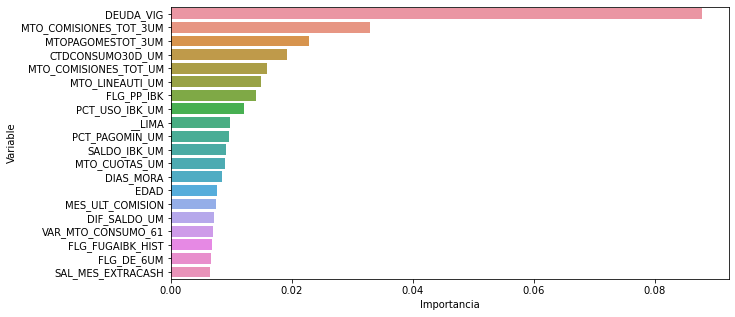

In [377]:
plt.figure(figsize=(10,5))
sns.barplot(x="Importancia", y="Variable", data=df_variables_importantes_xgb.head(20))

In [ ]:
# variable mas importante euribor3m

# para edad, para una persona joven y una adulta quien es más probable que compre el producto?

##### Modelo con las 20 variables más importantes

In [378]:
lista_variables_importantes = list(df_variables_importantes_xgb['Variable'].head(20))
lista_variables_importantes

['DEUDA_VIG',
 'MTO_COMISIONES_TOT_3UM',
 'MTOPAGOMESTOT_3UM',
 'CTDCONSUMO30D_UM',
 'MTO_COMISIONES_TOT_UM',
 'MTO_LINEAUTI_UM',
 'FLG_PP_IBK',
 'PCT_USO_IBK_UM',
 '__LIMA',
 'PCT_PAGOMIN_UM',
 'SALDO_IBK_UM',
 'MTO_CUOTAS_UM',
 'DIAS_MORA',
 'EDAD',
 'MES_ULT_COMISION',
 'DIF_SALDO_UM',
 'VAR_MTO_CONSUMO_61',
 'FLG_FUGAIBK_HIST',
 'FLG_DE_6UM',
 'SAL_MES_EXTRACASH']

## 1.2 Light GBM

![lgb.png](lgb.png "lgb.png")

In [379]:
import lightgbm as lgb

In [48]:
#help(lgb)

Definir data

In [380]:
train_data_lgb = lgb.Dataset(X_train, label=y_train)
test_data_lgb = lgb.Dataset(X_test, label=y_test)

Parámetros

In [381]:
parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'false',  #desbalanceada
    'boosting': 'gbdt',
    'max_depth':3,
    'num_leaves': 5,#31,
    'feature_fraction': 0.95,
    'bagging_fraction': 0.95,
    'bagging_freq': 20,
    'learning_rate': 0.003, # es conveniente xq podriamos meter mas arboles 3000 x ejem
    'verbose': 0
}

Entrenar

In [382]:
# valid_0 es de mi test

model = lgb.train(parameters,
                       train_data_lgb,
                       valid_sets=test_data_lgb,
                       num_boost_round=3000, ##3000 arboles
                       early_stopping_rounds=100, )  ### y para en 100

[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032784 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[1]	valid_0's auc: 0.698103
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.698103
[3]	valid_0's auc: 0.698103
[4]	valid_0's auc: 0.698103
[5]	valid_0's auc: 0.698103
[6]	valid_0's auc: 0.698103
[7]	valid_0's auc: 0.704917
[8]	valid_0's auc: 0.704917
[9]	valid_0's auc: 0.710015
[10]	valid_0's auc:

[258]	valid_0's auc: 0.729781
[259]	valid_0's auc: 0.729829
[260]	valid_0's auc: 0.729908
[261]	valid_0's auc: 0.729996
[262]	valid_0's auc: 0.7301
[263]	valid_0's auc: 0.730225
[264]	valid_0's auc: 0.730232
[265]	valid_0's auc: 0.730261
[266]	valid_0's auc: 0.73034
[267]	valid_0's auc: 0.73038
[268]	valid_0's auc: 0.730392
[269]	valid_0's auc: 0.730408
[270]	valid_0's auc: 0.730488
[271]	valid_0's auc: 0.730519
[272]	valid_0's auc: 0.730455
[273]	valid_0's auc: 0.730512
[274]	valid_0's auc: 0.730558
[275]	valid_0's auc: 0.730561
[276]	valid_0's auc: 0.730576
[277]	valid_0's auc: 0.730591
[278]	valid_0's auc: 0.730658
[279]	valid_0's auc: 0.730698
[280]	valid_0's auc: 0.730787
[281]	valid_0's auc: 0.730802
[282]	valid_0's auc: 0.73083
[283]	valid_0's auc: 0.730834
[284]	valid_0's auc: 0.730848
[285]	valid_0's auc: 0.730827
[286]	valid_0's auc: 0.730854
[287]	valid_0's auc: 0.730916
[288]	valid_0's auc: 0.730882
[289]	valid_0's auc: 0.730938
[290]	valid_0's auc: 0.73092
[291]	valid_0's 

[547]	valid_0's auc: 0.741639
[548]	valid_0's auc: 0.741668
[549]	valid_0's auc: 0.741763
[550]	valid_0's auc: 0.741817
[551]	valid_0's auc: 0.741886
[552]	valid_0's auc: 0.741922
[553]	valid_0's auc: 0.741965
[554]	valid_0's auc: 0.742068
[555]	valid_0's auc: 0.742076
[556]	valid_0's auc: 0.742195
[557]	valid_0's auc: 0.742307
[558]	valid_0's auc: 0.742327
[559]	valid_0's auc: 0.742369
[560]	valid_0's auc: 0.742468
[561]	valid_0's auc: 0.742492
[562]	valid_0's auc: 0.742512
[563]	valid_0's auc: 0.742564
[564]	valid_0's auc: 0.742587
[565]	valid_0's auc: 0.74262
[566]	valid_0's auc: 0.742657
[567]	valid_0's auc: 0.742694
[568]	valid_0's auc: 0.742734
[569]	valid_0's auc: 0.742793
[570]	valid_0's auc: 0.742827
[571]	valid_0's auc: 0.742876
[572]	valid_0's auc: 0.742941
[573]	valid_0's auc: 0.742985
[574]	valid_0's auc: 0.743053
[575]	valid_0's auc: 0.743104
[576]	valid_0's auc: 0.743173
[577]	valid_0's auc: 0.743226
[578]	valid_0's auc: 0.743271
[579]	valid_0's auc: 0.743297
[580]	valid

[830]	valid_0's auc: 0.750451
[831]	valid_0's auc: 0.750477
[832]	valid_0's auc: 0.7505
[833]	valid_0's auc: 0.750534
[834]	valid_0's auc: 0.750547
[835]	valid_0's auc: 0.750578
[836]	valid_0's auc: 0.750588
[837]	valid_0's auc: 0.750598
[838]	valid_0's auc: 0.750623
[839]	valid_0's auc: 0.75065
[840]	valid_0's auc: 0.750684
[841]	valid_0's auc: 0.750701
[842]	valid_0's auc: 0.75073
[843]	valid_0's auc: 0.750751
[844]	valid_0's auc: 0.750772
[845]	valid_0's auc: 0.750786
[846]	valid_0's auc: 0.750804
[847]	valid_0's auc: 0.750818
[848]	valid_0's auc: 0.750833
[849]	valid_0's auc: 0.750844
[850]	valid_0's auc: 0.750868
[851]	valid_0's auc: 0.75089
[852]	valid_0's auc: 0.750922
[853]	valid_0's auc: 0.750947
[854]	valid_0's auc: 0.750965
[855]	valid_0's auc: 0.750992
[856]	valid_0's auc: 0.75102
[857]	valid_0's auc: 0.751037
[858]	valid_0's auc: 0.751055
[859]	valid_0's auc: 0.751076
[860]	valid_0's auc: 0.751093
[861]	valid_0's auc: 0.751136
[862]	valid_0's auc: 0.751163
[863]	valid_0's 

[1109]	valid_0's auc: 0.756892
[1110]	valid_0's auc: 0.756899
[1111]	valid_0's auc: 0.756913
[1112]	valid_0's auc: 0.756941
[1113]	valid_0's auc: 0.756957
[1114]	valid_0's auc: 0.756987
[1115]	valid_0's auc: 0.757001
[1116]	valid_0's auc: 0.75701
[1117]	valid_0's auc: 0.757042
[1118]	valid_0's auc: 0.757063
[1119]	valid_0's auc: 0.757078
[1120]	valid_0's auc: 0.75709
[1121]	valid_0's auc: 0.757129
[1122]	valid_0's auc: 0.757154
[1123]	valid_0's auc: 0.757182
[1124]	valid_0's auc: 0.757203
[1125]	valid_0's auc: 0.757238
[1126]	valid_0's auc: 0.757263
[1127]	valid_0's auc: 0.757291
[1128]	valid_0's auc: 0.757335
[1129]	valid_0's auc: 0.757359
[1130]	valid_0's auc: 0.757393
[1131]	valid_0's auc: 0.757396
[1132]	valid_0's auc: 0.757429
[1133]	valid_0's auc: 0.757455
[1134]	valid_0's auc: 0.757479
[1135]	valid_0's auc: 0.757516
[1136]	valid_0's auc: 0.757534
[1137]	valid_0's auc: 0.757554
[1138]	valid_0's auc: 0.757587
[1139]	valid_0's auc: 0.757597
[1140]	valid_0's auc: 0.757617
[1141]	val

[1377]	valid_0's auc: 0.76096
[1378]	valid_0's auc: 0.760974
[1379]	valid_0's auc: 0.760991
[1380]	valid_0's auc: 0.761003
[1381]	valid_0's auc: 0.761021
[1382]	valid_0's auc: 0.761032
[1383]	valid_0's auc: 0.761042
[1384]	valid_0's auc: 0.761055
[1385]	valid_0's auc: 0.761088
[1386]	valid_0's auc: 0.761109
[1387]	valid_0's auc: 0.761137
[1388]	valid_0's auc: 0.761145
[1389]	valid_0's auc: 0.761155
[1390]	valid_0's auc: 0.761175
[1391]	valid_0's auc: 0.761187
[1392]	valid_0's auc: 0.761202
[1393]	valid_0's auc: 0.761208
[1394]	valid_0's auc: 0.761218
[1395]	valid_0's auc: 0.761231
[1396]	valid_0's auc: 0.761257
[1397]	valid_0's auc: 0.761275
[1398]	valid_0's auc: 0.761289
[1399]	valid_0's auc: 0.761305
[1400]	valid_0's auc: 0.761321
[1401]	valid_0's auc: 0.761324
[1402]	valid_0's auc: 0.761367
[1403]	valid_0's auc: 0.761365
[1404]	valid_0's auc: 0.761396
[1405]	valid_0's auc: 0.761406
[1406]	valid_0's auc: 0.761407
[1407]	valid_0's auc: 0.761426
[1408]	valid_0's auc: 0.761428
[1409]	va

[1649]	valid_0's auc: 0.76452
[1650]	valid_0's auc: 0.764539
[1651]	valid_0's auc: 0.76455
[1652]	valid_0's auc: 0.764559
[1653]	valid_0's auc: 0.76456
[1654]	valid_0's auc: 0.764564
[1655]	valid_0's auc: 0.76457
[1656]	valid_0's auc: 0.764578
[1657]	valid_0's auc: 0.764586
[1658]	valid_0's auc: 0.764599
[1659]	valid_0's auc: 0.764605
[1660]	valid_0's auc: 0.764617
[1661]	valid_0's auc: 0.764629
[1662]	valid_0's auc: 0.76465
[1663]	valid_0's auc: 0.764668
[1664]	valid_0's auc: 0.764688
[1665]	valid_0's auc: 0.764704
[1666]	valid_0's auc: 0.764719
[1667]	valid_0's auc: 0.764737
[1668]	valid_0's auc: 0.764744
[1669]	valid_0's auc: 0.764758
[1670]	valid_0's auc: 0.764761
[1671]	valid_0's auc: 0.764773
[1672]	valid_0's auc: 0.76478
[1673]	valid_0's auc: 0.76478
[1674]	valid_0's auc: 0.764783
[1675]	valid_0's auc: 0.764791
[1676]	valid_0's auc: 0.764815
[1677]	valid_0's auc: 0.764822
[1678]	valid_0's auc: 0.764832
[1679]	valid_0's auc: 0.764833
[1680]	valid_0's auc: 0.764839
[1681]	valid_0'

[1925]	valid_0's auc: 0.767088
[1926]	valid_0's auc: 0.767098
[1927]	valid_0's auc: 0.767112
[1928]	valid_0's auc: 0.767131
[1929]	valid_0's auc: 0.767138
[1930]	valid_0's auc: 0.767151
[1931]	valid_0's auc: 0.767175
[1932]	valid_0's auc: 0.767189
[1933]	valid_0's auc: 0.767195
[1934]	valid_0's auc: 0.767217
[1935]	valid_0's auc: 0.767233
[1936]	valid_0's auc: 0.767244
[1937]	valid_0's auc: 0.767253
[1938]	valid_0's auc: 0.767264
[1939]	valid_0's auc: 0.767269
[1940]	valid_0's auc: 0.767283
[1941]	valid_0's auc: 0.767288
[1942]	valid_0's auc: 0.767294
[1943]	valid_0's auc: 0.767306
[1944]	valid_0's auc: 0.767316
[1945]	valid_0's auc: 0.767325
[1946]	valid_0's auc: 0.767339
[1947]	valid_0's auc: 0.767341
[1948]	valid_0's auc: 0.767347
[1949]	valid_0's auc: 0.767359
[1950]	valid_0's auc: 0.767358
[1951]	valid_0's auc: 0.767363
[1952]	valid_0's auc: 0.767375
[1953]	valid_0's auc: 0.767383
[1954]	valid_0's auc: 0.767389
[1955]	valid_0's auc: 0.76739
[1956]	valid_0's auc: 0.767398
[1957]	va

[2208]	valid_0's auc: 0.769156
[2209]	valid_0's auc: 0.769158
[2210]	valid_0's auc: 0.769149
[2211]	valid_0's auc: 0.769152
[2212]	valid_0's auc: 0.76916
[2213]	valid_0's auc: 0.769166
[2214]	valid_0's auc: 0.769173
[2215]	valid_0's auc: 0.769171
[2216]	valid_0's auc: 0.769173
[2217]	valid_0's auc: 0.76917
[2218]	valid_0's auc: 0.769176
[2219]	valid_0's auc: 0.769173
[2220]	valid_0's auc: 0.769178
[2221]	valid_0's auc: 0.769194
[2222]	valid_0's auc: 0.769205
[2223]	valid_0's auc: 0.769219
[2224]	valid_0's auc: 0.769234
[2225]	valid_0's auc: 0.769243
[2226]	valid_0's auc: 0.769256
[2227]	valid_0's auc: 0.769273
[2228]	valid_0's auc: 0.769283
[2229]	valid_0's auc: 0.769299
[2230]	valid_0's auc: 0.769299
[2231]	valid_0's auc: 0.769317
[2232]	valid_0's auc: 0.769313
[2233]	valid_0's auc: 0.769322
[2234]	valid_0's auc: 0.769325
[2235]	valid_0's auc: 0.76934
[2236]	valid_0's auc: 0.769348
[2237]	valid_0's auc: 0.769347
[2238]	valid_0's auc: 0.769361
[2239]	valid_0's auc: 0.769362
[2240]	vali

[2477]	valid_0's auc: 0.770509
[2478]	valid_0's auc: 0.770511
[2479]	valid_0's auc: 0.770509
[2480]	valid_0's auc: 0.770518
[2481]	valid_0's auc: 0.770519
[2482]	valid_0's auc: 0.770522
[2483]	valid_0's auc: 0.770537
[2484]	valid_0's auc: 0.770539
[2485]	valid_0's auc: 0.770549
[2486]	valid_0's auc: 0.770554
[2487]	valid_0's auc: 0.770562
[2488]	valid_0's auc: 0.770569
[2489]	valid_0's auc: 0.770589
[2490]	valid_0's auc: 0.770598
[2491]	valid_0's auc: 0.770608
[2492]	valid_0's auc: 0.770613
[2493]	valid_0's auc: 0.770617
[2494]	valid_0's auc: 0.770626
[2495]	valid_0's auc: 0.770626
[2496]	valid_0's auc: 0.770639
[2497]	valid_0's auc: 0.770646
[2498]	valid_0's auc: 0.770654
[2499]	valid_0's auc: 0.770655
[2500]	valid_0's auc: 0.770667
[2501]	valid_0's auc: 0.770679
[2502]	valid_0's auc: 0.770696
[2503]	valid_0's auc: 0.770709
[2504]	valid_0's auc: 0.770713
[2505]	valid_0's auc: 0.770713
[2506]	valid_0's auc: 0.770725
[2507]	valid_0's auc: 0.770742
[2508]	valid_0's auc: 0.770755
[2509]	v

[2749]	valid_0's auc: 0.772134
[2750]	valid_0's auc: 0.77214
[2751]	valid_0's auc: 0.772139
[2752]	valid_0's auc: 0.772146
[2753]	valid_0's auc: 0.772148
[2754]	valid_0's auc: 0.772149
[2755]	valid_0's auc: 0.772158
[2756]	valid_0's auc: 0.772163
[2757]	valid_0's auc: 0.772169
[2758]	valid_0's auc: 0.772172
[2759]	valid_0's auc: 0.772179
[2760]	valid_0's auc: 0.772189
[2761]	valid_0's auc: 0.772194
[2762]	valid_0's auc: 0.772194
[2763]	valid_0's auc: 0.772187
[2764]	valid_0's auc: 0.772192
[2765]	valid_0's auc: 0.772197
[2766]	valid_0's auc: 0.772196
[2767]	valid_0's auc: 0.772197
[2768]	valid_0's auc: 0.7722
[2769]	valid_0's auc: 0.772198
[2770]	valid_0's auc: 0.772204
[2771]	valid_0's auc: 0.772196
[2772]	valid_0's auc: 0.772198
[2773]	valid_0's auc: 0.772199
[2774]	valid_0's auc: 0.772206
[2775]	valid_0's auc: 0.772202
[2776]	valid_0's auc: 0.772196
[2777]	valid_0's auc: 0.772198
[2778]	valid_0's auc: 0.772192
[2779]	valid_0's auc: 0.772186
[2780]	valid_0's auc: 0.772186
[2781]	vali

In [ ]:
# tu mejor iteracion fue el 24 ---[24]	valid_0's auc: 0.799913
## llega a un punto maximo donde ya no mejora para no q no corra los 3000 arboles, osea lo para sino mejora
# ya no tiene sentido q siga corriendo los 3000 sino para un punto de cada 100

Plot variables imporantes

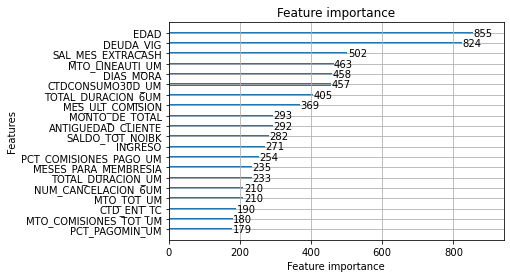

In [383]:
ax = lgb.plot_importance(model, max_num_features=20)
plt.show()

In [194]:
feature_imp = pd.DataFrame(sorted(zip(model.feature_importance(),X_train.columns)), columns=['Importancia','Variable'])
feature_imp.sort_values(by='Importancia', ascending=False, inplace=True)   

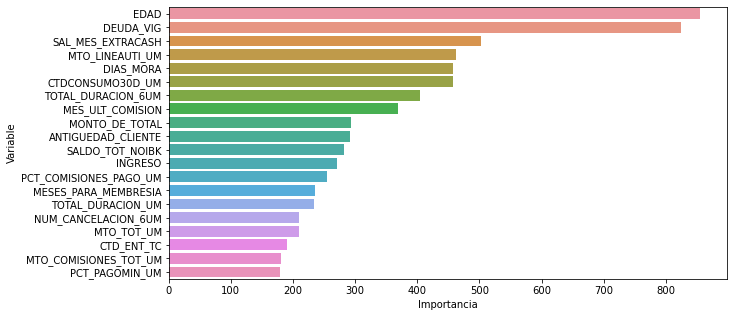

In [384]:
plt.figure(figsize=(10,5))
sns.barplot(x="Importancia", y="Variable", data=feature_imp.head(20))

Predicción

In [385]:
prediccion_lgb_test = model.predict(X_test, num_iteration=model.best_iteration)
prediccion_lgb_train = model.predict(X_train, num_iteration=model.best_iteration)

In [386]:
prediccion_lgb_test

array([0.53122684, 0.52868786, 0.37638592, ..., 0.72175979, 0.45408578,
       0.50392691])

AUC

In [387]:
print('AUC Light GBM test:',roc_auc_score(y_test, prediccion_lgb_test))
print('AUC Light GBM train:',roc_auc_score(y_train, prediccion_lgb_train))

AUC Light GBM test: 0.773217840633571
AUC Light GBM train: 0.8106325359578502


In [ ]:
# hay un poco d sobreajuste

In [388]:
roc_auc_score(y_test, prediccion_lgb_test) ### VEMOS LA PRECISION Q ESTA POR XGBOOST CERCA ES MUY BUENO ESTE Q MODELO

0.773217840633571

## 1.3 CatBoost

In [389]:
from catboost import CatBoostClassifier

In [123]:
# help(CatBoostClassifier)

In [390]:
modelo_catboost = CatBoostClassifier(eval_metric="AUC", depth=3, 
                                     iterations= 100, l2_leaf_reg= 9, learning_rate= 0.08)

In [391]:
modelo_catboost.fit(X_train,y_train,eval_set=(X_test,y_test))

0:	test: 0.6993168	best: 0.6993168 (0)	total: 81.1ms	remaining: 8.03s
1:	test: 0.7118313	best: 0.7118313 (1)	total: 103ms	remaining: 5.06s
2:	test: 0.7175474	best: 0.7175474 (2)	total: 126ms	remaining: 4.08s
3:	test: 0.7212420	best: 0.7212420 (3)	total: 149ms	remaining: 3.58s
4:	test: 0.7209106	best: 0.7212420 (3)	total: 172ms	remaining: 3.26s
5:	test: 0.7241751	best: 0.7241751 (5)	total: 193ms	remaining: 3.02s
6:	test: 0.7272342	best: 0.7272342 (6)	total: 216ms	remaining: 2.87s
7:	test: 0.7291233	best: 0.7291233 (7)	total: 239ms	remaining: 2.74s
8:	test: 0.7295811	best: 0.7295811 (8)	total: 262ms	remaining: 2.65s
9:	test: 0.7324204	best: 0.7324204 (9)	total: 287ms	remaining: 2.58s
10:	test: 0.7340812	best: 0.7340812 (10)	total: 309ms	remaining: 2.5s
11:	test: 0.7340640	best: 0.7340812 (10)	total: 335ms	remaining: 2.46s
12:	test: 0.7351397	best: 0.7351397 (12)	total: 367ms	remaining: 2.45s
13:	test: 0.7357093	best: 0.7357093 (13)	total: 394ms	remaining: 2.42s
14:	test: 0.7366728	best: 

In [392]:
df_variables_importantes_catboost = variables_importantes(modelo_catboost, X_train.columns)
df_variables_importantes_catboost.head(10)

,Importancia,Variable
112,27.159852,DEUDA_VIG
237,9.112570,MTO_LINEAUTI_UM
0,6.037524,EDAD
207,5.213953,MES_ULT_COMISION
243,5.037129,CTDCONSUMO30D_UM
107,3.129685,TOTAL_DURACION_6UM
120,3.045948,SAL_MES_EXTRACASH
16,2.153683,MTO_TOT_UM
111,1.562347,DIAS_MORA
157,1.518624,PCT_LINEA_SF_IBK_6UM


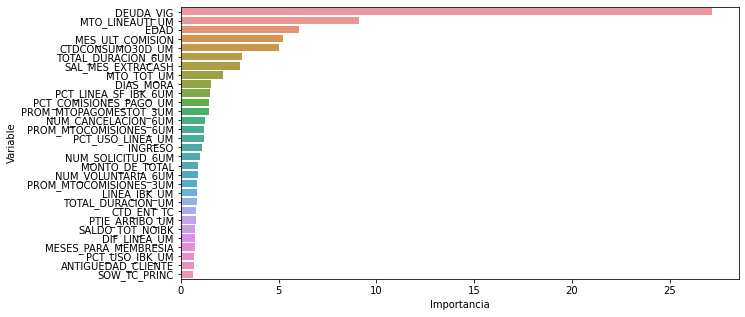

In [393]:
plt.figure(figsize=(10,5))
sns.barplot(x="Importancia", y="Variable", data=df_variables_importantes_catboost.head(30))

Predicción

In [394]:
#bestIteration = 99  ... hasta el 99 es  LA MEJOR ITERACION X ESO PONEMOS ELLO IGUALMENTE DEBES D HACER ELLO AL LIGHTGBM
prediccion_catboost_test= modelo_catboost.predict_proba(X_test,ntree_end=99)
prediccion_catboost_train = modelo_catboost.predict_proba(X_train,ntree_end=99)

AUC

In [395]:
print('AUC CatBoost test:',roc_auc_score(y_test, prediccion_catboost_test[:,1]))
print('AUC CatBoost train:',roc_auc_score(y_train, prediccion_catboost_train[:,1]))

AUC CatBoost test: 0.7662837550478001
AUC CatBoost train: 0.7905849509214385


Accuracy

In [396]:
print('Accuracy CatBoost test:',modelo_catboost.score(X_test,y_test))
print('Accuracy CatBoost train:',modelo_catboost.score(X_train,y_train))

Accuracy CatBoost test: 0.7011840688912809
Accuracy CatBoost train: 0.7191104549229491


In [400]:
prediccion_catboost_test[:,1]

array([0.55795839, 0.48756757, 0.43952081, ..., 0.70005711, 0.44954348,
       0.53337811])